# 3. Regression
In this notebook we will finally run our regression models. For that purpose, we are importing the necessary libraries and functions from our ```modules``` folder. We are also importing our extracted dataframe

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor



In [2]:
# We import our own functions
import sys
sys.path.append('../../..')  # Move two levels up to the project root
from modules.functions import *

In [3]:
df = pd.read_csv('../../../input/df_raw_c19.csv', parse_dates=['Fecha'], index_col='Fecha')
df.tail()

,CPI Core,CPI Tradable,CPI Non-Tradable,CPI,CPI Non-Core,CPI Food and Energy,CPI Excluding Food and Energy,CPI Food and Beverages,CPI Excluding Food and Beverages,CPI Core Excluding Food and Beverages,...,Wholesale Price Index,Reserve Requirement Rate,Monetary Policy Rate,Circulating Currency Seasonally Adjusted (mill S/),Net International Reserves (mill $),Real Minimum Wage (Index),Wheat (US$ per ton),Corn (US$ per ton),Soybean oil (US$ per ton),Crude oil (US$ per barrel)
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-08-01,0.172176,0.107169,0.182206,0.155238,0.120649,0.117414,0.187309,0.076524,0.207174,0.194464,...,-0.013811,6.414301,2.50,0.007826,0.022711,-0.000609,-0.071854,-0.127216,0.016693,-0.044064
2019-09-01,0.168668,0.103574,0.179086,0.151966,0.117677,0.111047,0.186615,0.065826,0.208745,0.190797,...,-0.029031,5.899530,2.50,0.008478,-0.005991,-0.000064,-0.028875,-0.044102,0.019052,0.037436
2019-10-01,0.165254,0.100074,0.176011,0.148757,0.114708,0.104757,0.185969,0.055385,0.210242,0.187204,...,-0.044027,6.577864,2.50,0.003873,0.001857,-0.001106,0.040636,0.066893,0.042443,-0.050909
2019-11-01,0.161942,0.096671,0.173140,0.145714,0.112035,0.098706,0.185426,0.045367,0.211728,0.183707,...,-0.058820,6.069958,2.25,0.006119,-0.017871,-0.001088,0.072377,-0.035344,0.026200,0.057743
2019-12-01,0.158729,0.093373,0.170545,0.142886,0.109809,0.092980,0.185001,0.035862,0.213221,0.180317,...,-0.073404,6.703983,2.25,0.011324,0.023139,-0.002141,0.032523,0.007789,0.057206,0.049040


In [4]:
df_lags = pd.read_csv('../../../input/df_lags_c19.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.tail()

,CPI Core,CPI Tradable_lag_1,CPI Tradable_lag_2,CPI Non-Tradable_lag_1,CPI Non-Tradable_lag_2,CPI_lag_1,CPI_lag_2,CPI Non-Core_lag_1,CPI Non-Core_lag_2,CPI Food and Energy_lag_1,...,Real Minimum Wage (Index)_lag_1,Real Minimum Wage (Index)_lag_2,Wheat (US$ per ton)_lag_1,Wheat (US$ per ton)_lag_2,Corn (US$ per ton)_lag_1,Corn (US$ per ton)_lag_2,Soybean oil (US$ per ton)_lag_1,Soybean oil (US$ per ton)_lag_2,Crude oil (US$ per barrel)_lag_1,Crude oil (US$ per barrel)_lag_2
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-08-01,0.172176,0.110871,0.114674,0.185235,0.188145,0.158490,0.161702,0.123430,0.126055,0.123753,...,-0.002029,0.000863,-0.078909,0.071044,0.011487,0.168096,0.006573,0.042708,0.048935,-0.099863
2019-09-01,0.168668,0.107169,0.110871,0.182206,0.185235,0.155238,0.158490,0.120649,0.123430,0.117414,...,-0.000609,-0.002029,-0.071854,-0.078909,-0.127216,0.011487,0.016693,0.006573,-0.044064,0.048935
2019-10-01,0.165254,0.103574,0.107169,0.179086,0.182206,0.151966,0.155238,0.117677,0.120649,0.111047,...,-0.000064,-0.000609,-0.028875,-0.071854,-0.044102,-0.127216,0.019052,0.016693,0.037436,-0.044064
2019-11-01,0.161942,0.100074,0.103574,0.176011,0.179086,0.148757,0.151966,0.114708,0.117677,0.104757,...,-0.001106,-0.000064,0.040636,-0.028875,0.066893,-0.044102,0.042443,0.019052,-0.050909,0.037436
2019-12-01,0.158729,0.096671,0.100074,0.173140,0.176011,0.145714,0.148757,0.112035,0.114708,0.098706,...,-0.001088,-0.001106,0.072377,0.040636,-0.035344,0.066893,0.026200,0.042443,0.057743,-0.050909


## 3.1 Benchmark models

In the first section, we first run our benchmark econometric models: ```Random Walk (RW)```,  ```Autoregressive Integrated Moving Average (ARIMA)``` and ```Vector Autoregression (VAR)``` processes

### 3.1.1 Random Walk (RW)

In [5]:
forecast_horizons = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# We define our target variable
target = 'CPI Core'

# We only use CPI as Random Walk is an univariate process
df_CPI_Core = pd.DataFrame(df_lags['CPI Core'])

# We create our train and test set
train_set = df_CPI_Core[df_CPI_Core.index < '2019-01-01']
test_set  = df_CPI_Core[df_CPI_Core.index >= '2019-01-01']

predictions = {}

for h in forecast_horizons:
    # We get the values h horizons before
    predicted_value = train_set.iloc[-1, 0] 

    # We save it for horizon h
    predictions[h] = predicted_value

predicted = pd.DataFrame([predictions]).transpose().reset_index()

predicted.columns = ['Horizon', 'Prediction']

predicted = predicted.set_index(test_set.index)

predicted

,Horizon,Prediction
Fecha,,
2019-01-01,1,0.202035
2019-02-01,2,0.202035
2019-03-01,3,0.202035
2019-04-01,4,0.202035
2019-05-01,5,0.202035
2019-06-01,6,0.202035
2019-07-01,7,0.202035
2019-08-01,8,0.202035
2019-09-01,9,0.202035


In [6]:
# We create our results dataframe, concatenating the predicted and the actual values
results = pd.concat([predicted, test_set[target]], axis=1)
results.rename(columns={'Horizon': 'Horizon', 'Prediction': 'Predicted', 'CPI Core': 'Actual'}, inplace=True)
results

,Horizon,Predicted,Actual
Fecha,,,
2019-01-01,1,0.202035,0.197020
2019-02-01,2,0.202035,0.193185
2019-03-01,3,0.202035,0.189774
2019-04-01,4,0.202035,0.186363
2019-05-01,5,0.202035,0.182886
2019-06-01,6,0.202035,0.179341
2019-07-01,7,0.202035,0.175751
2019-08-01,8,0.202035,0.172176
2019-09-01,9,0.202035,0.168668


In [7]:
# We get our metrics using our function
RMSE_rw, MAPE_rw = get_metrics(results, 'RW')
metrics_rw = pd.concat([RMSE_rw, MAPE_rw], axis = 1)
metrics_rw

,RMSE_RW,MAPE_RW
1,0.005014,0.025450
2,0.007192,0.035630
3,0.009197,0.045288
4,0.011173,0.054988
5,0.013161,0.064931
6,0.015171,0.075199
7,0.017204,0.085821
8,0.019246,0.096771
9,0.021283,0.107999
10,0.023301,0.119456


### 3.1.2 Autoregressive Integrated Moving Average (ARIMA)

In [8]:
# We only use CPI as ARIMA is an univariate process
df_CPI_Core = pd.DataFrame(df_lags['CPI Core'])

# We create our train and test set
train_set = df_CPI_Core[df_CPI_Core.index < '2019-01-01']
test_set  = df_CPI_Core[df_CPI_Core.index >= '2019-01-01']

In [9]:
# We find the best SARIMA model
autoarima = pmd.auto_arima(
        y = train_set,
        start_p=1,
        start_q=0,
        seasonal=True,
        max_p=12,
        max_d=1,
        max_q=6,
        max_P=12,
        max_D=1,
        max_Q=6,
        m=4,
        n_jobs=-1,
        suppress_warnings=True,
        )

# We indicate the seasonal order for monthly data
seasonal_order = (1, 1, 1, 12)

# We create our ARIMA model
model = SARIMAX(train_set,
                order=autoarima.order,
                seasonal_order=autoarima.seasonal_order,
                enforce_stationarity = False,
                enforce_invertibility = False)
        
# We fit the model
model_fit = model.fit()

# We forecast for the next 12 horizons
forecast_values = model_fit.get_forecast(steps=12)
predicted = pd.DataFrame(forecast_values.predicted_mean, index = test_set.index)

# We create our results dataframe, concatenating the predicted and the actual values
results = pd.concat([predicted, test_set[target]], axis=1)
results.rename(columns={'predicted_mean': 'Predicted', 'CPI Core': 'Actual'}, inplace=True)
results

,Predicted,Actual
Fecha,,
2019-01-01,0.196829,0.197020
2019-02-01,0.191032,0.193185
2019-03-01,0.184859,0.189774
2019-04-01,0.178525,0.186363
2019-05-01,0.172234,0.182886
2019-06-01,0.166177,0.179341
2019-07-01,0.160523,0.175751
2019-08-01,0.155420,0.172176
2019-09-01,0.150989,0.168668


In [10]:
# We get our metrics using our function
RMSE_arima, MAPE_arima = get_metrics(results, 'ARIMA')
metrics_arima= pd.concat([RMSE_arima, MAPE_arima], axis = 1)
metrics_arima

,RMSE_ARIMA,MAPE_ARIMA
1,0.000191,0.000971
2,0.001528,0.006058
3,0.003100,0.012672
4,0.004750,0.020019
5,0.006383,0.027664
6,0.007927,0.035287
7,0.009327,0.042624
8,0.010546,0.049461
9,0.011558,0.055611
10,0.012344,0.060902


### 3.1.3 Vector autoregression (VAR)

In [11]:
# We define our target variable, as well as our train and test set
target = 'CPI Core'
train_set = df[df.index < '2019-01-01']
test_set  = df[df.index >= '2019-01-01']

In [12]:
# We model our VAR including up to two lags
model_var = VAR(df)
model_fit = model_var.fit(2)

In [13]:
# We forecast for the next 12 months
preds = model_fit.forecast(df.values[-2:], 12)
preds = pd.DataFrame(preds, index = test_set[target].index)[0]

# We create our results dataframe, concatenating the predicted and the actual values
results = pd.concat([preds, test_set[target]],axis=1)
results.rename(columns={'CPI Core': 'Actual', 0: 'Predicted'}, inplace=True)
results

,Predicted,Actual
Fecha,,
2019-01-01,0.155995,0.197020
2019-02-01,0.153987,0.193185
2019-03-01,0.152997,0.189774
2019-04-01,0.153318,0.186363
2019-05-01,0.155325,0.182886
2019-06-01,0.159388,0.179341
2019-07-01,0.165843,0.175751
2019-08-01,0.174974,0.172176
2019-09-01,0.186951,0.168668


In [14]:
# We get our metrics using our function
RMSE_var, MAPE_var = get_metrics(results, 'VAR')
metrics_var= pd.concat([RMSE_var, MAPE_var], axis = 1)
metrics_var

,RMSE_VAR,MAPE_VAR
1,0.041025,0.208227
2,0.040122,0.205566
3,0.039039,0.201642
4,0.037630,0.195560
5,0.035843,0.186588
6,0.033719,0.174033
7,0.031441,0.157224
8,0.029427,0.139602
9,0.028406,0.136135
10,0.029322,0.144636


<Axes: >

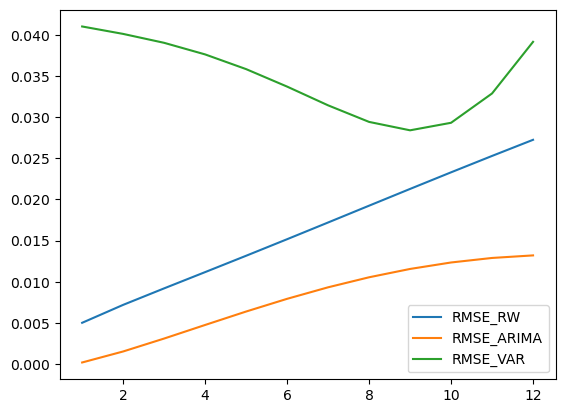

In [15]:
rmse_econometrics = pd.concat([RMSE_rw, RMSE_arima, RMSE_var], axis=1)

rmse_econometrics.plot()

## 3.2 Machine learning models

In the second section, we run our machine learning models: ```Ridge Regression (Ridge)```,  ```Least Absolute Shrinkage and Selection Operator (LASSO)``` and ```Random Forest (RF)``` models

### 3.2.1 Ridge Regression (Ridge)

In [16]:
target = "CPI Core"
Y = pd.DataFrame(df_lags[target])
X = df_lags.drop(columns=[target])

y_train = train_set[target]
y_test  = test_set[target]
X_train = train_set.loc[:, train_set.columns != target]
X_test  = test_set.loc[:, test_set.columns != target]

# Implementing the temporal cross-validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5, test_size= 12)

# We implement the model
import sklearn.linear_model as skl
ridge = skl.ElasticNet(l1_ratio=0)
model = ridge

# We define out lambdas and implement our gridparams
lambdas    = np.linspace(0.0001, 1, 1000)

grid_params = {'alpha': lambdas}

# We implement our gridsearch
grid_search = GridSearchCV( model, grid_params, cv = tscv, scoring = 'neg_mean_squared_error')

grid_search.fit( X_train, y_train )

pd.DataFrame( grid_search.cv_results_ )

# And select out best model
best_model  = grid_search.best_estimator_
best_params = grid_search.best_params_

In [17]:
pred_vars = X_train.columns.to_list()
coefficients = best_model.coef_
vars_df_ridge      = pd.DataFrame( {'Var': best_model.feature_names_in_, 'Coefficient': coefficients } )
vars_df_ridge      = vars_df_ridge.reindex( vars_df_ridge[ 'Coefficient' ].abs().sort_values( ascending = False ).index )
vars_df_ridge.to_excel( f'../../../output/3_Regression/c19/c19coef_ridge.xlsx' )

In [18]:
# We use the best model to predict
y_pred = best_model.predict( X_test )
y_pred = pd.Series(y_pred, index = y_test.index)
print(y_pred)

Fecha
2019-01-01    0.199919
2019-02-01    0.195896
2019-03-01    0.191207
2019-04-01    0.189631
2019-05-01    0.183890
2019-06-01    0.179707
2019-07-01    0.177357
2019-08-01    0.172443
2019-09-01    0.168126
2019-10-01    0.164458
2019-11-01    0.159808
2019-12-01    0.158275
dtype: float64


In [19]:
# And concatenate the results
results = pd.concat([y_pred, y_test],axis=1)
results.rename(columns={'CPI Core': 'Actual', 0: 'Predicted'}, inplace=True)
results

,Predicted,Actual
Fecha,,
2019-01-01,0.199919,0.197020
2019-02-01,0.195896,0.193185
2019-03-01,0.191207,0.189774
2019-04-01,0.189631,0.186363
2019-05-01,0.183890,0.182886
2019-06-01,0.179707,0.179341
2019-07-01,0.177357,0.175751
2019-08-01,0.172443,0.172176
2019-09-01,0.168126,0.168668


In [20]:
RMSE_ridge, MAPE_ridge = get_metrics(results, 'Ridge')

<Axes: >

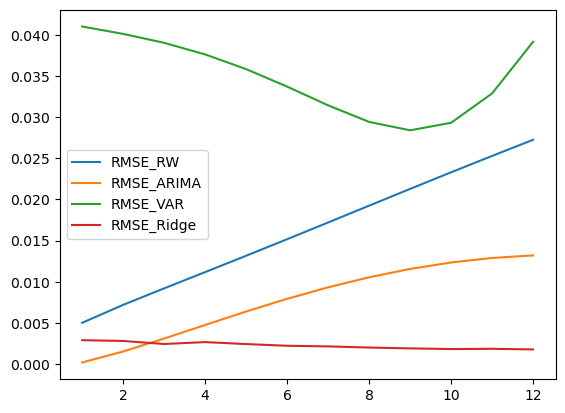

In [21]:
pd.concat([RMSE_rw, RMSE_arima, RMSE_var, RMSE_ridge], axis=1).plot()

### 3.2.2 Lasso Regression (Lasso)

In [22]:
target = "CPI Core"
Y = pd.DataFrame(df_lags[target])
X = df_lags.drop(columns=[target])

y_train = train_set[target]
y_test  = test_set[target]
X_train = train_set.loc[:, train_set.columns != target]
X_test  = test_set.loc[:, test_set.columns != target]

# We define the model
import sklearn.linear_model as skl
lasso = skl.ElasticNet( l1_ratio=1, random_state = 2024 )
model = lasso

# We define out lambdas and implement our gridparams
lambdas    = np.linspace(0.0001, 1, 1000)
grid_params = {'alpha': lambdas}

# We implement the gridsearch
grid_search = GridSearchCV( model, grid_params, cv = tscv, scoring = 'neg_mean_squared_error')
grid_search.fit( X_train, y_train )
pd.DataFrame( grid_search.cv_results_ )

best_model  = grid_search.best_estimator_
best_params = grid_search.best_params_

In [23]:
pred_vars = X_train.columns.to_list()
coefficients = best_model.coef_
vars_df_lasso      = pd.DataFrame( {'Var': best_model.feature_names_in_, 'Coefficient': coefficients } )
vars_df_lasso      = vars_df_lasso.reindex( vars_df_lasso[ 'Coefficient' ].abs().sort_values( ascending = False ).index )
vars_df_lasso.to_excel( f'../../../output/3_Regression/c19/c19coef_lasso.xlsx' )

In [24]:
y_pred = best_model.predict( X_test )
y_pred = pd.Series(y_pred, index = y_test.index)

In [25]:
results = pd.concat([y_pred, y_test],axis=1)
results.rename(columns={'CPI Core': 'Actual', 0: 'Predicted'}, inplace=True)
results

,Predicted,Actual
Fecha,,
2019-01-01,0.198928,0.197020
2019-02-01,0.194465,0.193185
2019-03-01,0.190306,0.189774
2019-04-01,0.186331,0.186363
2019-05-01,0.181957,0.182886
2019-06-01,0.177516,0.179341
2019-07-01,0.173040,0.175751
2019-08-01,0.168068,0.172176
2019-09-01,0.163621,0.168668


In [26]:
RMSE_lasso, MAPE_lasso = get_metrics(results, 'Lasso')

<Axes: >

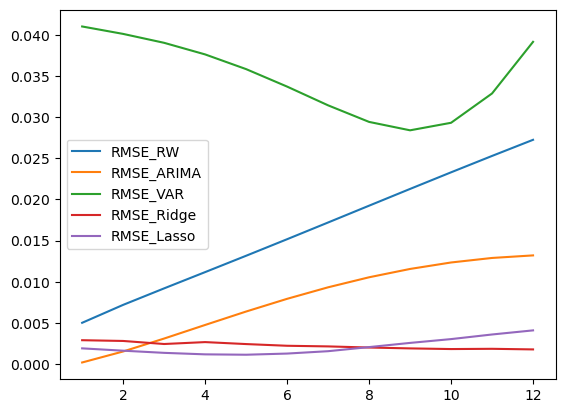

In [27]:
pd.concat([RMSE_rw, RMSE_arima, RMSE_var, RMSE_ridge, RMSE_lasso], axis=1).plot()

### 3.2.3 Random Forest Regression (Random Forest)

In [28]:
target = "CPI Core"
Y = pd.DataFrame(df_lags[target])
X = df_lags.drop(columns=[target])

y_train = train_set[target]
y_test  = test_set[target]
X_train = train_set.loc[:, train_set.columns != target]
X_test  = test_set.loc[:, test_set.columns != target]

# Implementing the temporal cross-validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5, test_size= 12)

# We implement the model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor( random_state = 2024, n_jobs = -1 )
model = random_forest

# We define out lambdas and implement our gridparams
n_estimators = [5, 6, 10, 12, 15]

max_depth = [10, 20, 30, 50]

grid_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# We implement our gridsearch
grid_search = GridSearchCV( model, grid_params, cv = tscv, scoring = 'neg_mean_squared_error')

grid_search.fit( X_train, y_train )

pd.DataFrame( grid_search.cv_results_ )

# And select out best model
best_model  = grid_search.best_estimator_
best_params = grid_search.best_params_

In [29]:
pred_vars = X_train.columns.to_list()
feature_importances = best_model.feature_importances_
vars_df_rf             = pd.DataFrame( {'Var': pred_vars, 'Importance Score': feature_importances } )
vars_df_rf             = vars_df_rf.reindex(vars_df_rf[ 'Importance Score' ].abs().sort_values( ascending = False ).index )
vars_df_rf.to_excel( f'../../../output/3_Regression/c19/c19coef_rf.xlsx' )

In [30]:
y_pred = best_model.predict( X_test )
y_pred = pd.Series(y_pred, index = y_test.index)

In [31]:
results = pd.concat([y_pred, y_test],axis=1)
results.rename(columns={'CPI Core': 'Actual', 0: 'Predicted'}, inplace=True)
results

,Predicted,Actual
Fecha,,
2019-01-01,0.207849,0.197020
2019-02-01,0.209150,0.193185
2019-03-01,0.210386,0.189774
2019-04-01,0.208323,0.186363
2019-05-01,0.207057,0.182886
2019-06-01,0.205662,0.179341
2019-07-01,0.206572,0.175751
2019-08-01,0.199556,0.172176
2019-09-01,0.199216,0.168668


In [32]:
RMSE_rf, MAPE_rf = get_metrics(results, 'RF')

## 3.3 Results
Here we concat all results into a single dataframe. We export the table to excel.


### 3.3.1 General results
Here we will create graphs and tables with the results of all models combined into a single datagrame.

In [33]:
RMSE_2019 = pd.concat([RMSE_rw, RMSE_arima, RMSE_var, RMSE_ridge, RMSE_lasso, RMSE_rf], axis=1)
MAPE_2019 = pd.concat([MAPE_rw, MAPE_arima, MAPE_var, MAPE_ridge, MAPE_lasso, MAPE_rf], axis=1)

<Axes: >

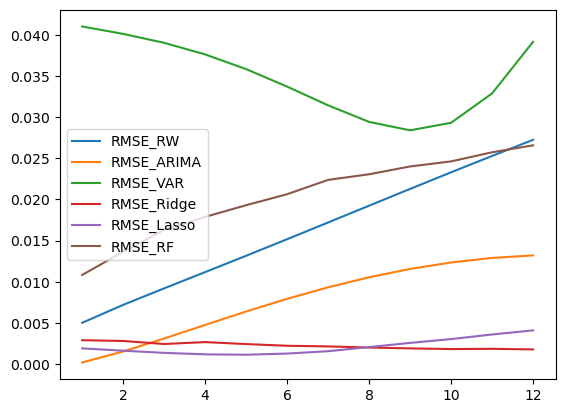

In [34]:
RMSE_2019.plot()

In [35]:
RMSE_2019_results = RMSE_2019.div(RMSE_rw['RMSE_RW'], axis=0)
RMSE_2019_results = RMSE_2019_results.drop(columns=['RMSE_RW'])
RMSE_2019_results_highlight = RMSE_2019_results.style.apply(highlight_min, axis=1)
RMSE_2019_results_highlight

,RMSE_ARIMA,RMSE_VAR,RMSE_Ridge,RMSE_Lasso,RMSE_RF
1,0.038169,8.181802,0.578035,0.380366,2.159623
2,0.212517,5.578462,0.390185,0.225810,1.896566
3,0.337047,4.244567,0.264874,0.147992,1.772152
4,0.425171,3.367899,0.238813,0.105512,1.600542
5,0.485022,2.723492,0.184527,0.086113,1.466879
6,0.522492,2.222521,0.146455,0.084022,1.360503
7,0.542117,1.827546,0.124673,0.090842,1.300883
8,0.547926,1.528978,0.104362,0.107073,1.198394
9,0.543050,1.334666,0.089381,0.120751,1.128209
10,0.529767,1.258364,0.078198,0.130145,1.056946


In [36]:
MAPE_2019_results = MAPE_2019.div(MAPE_rw['MAPE_RW'], axis=0)
MAPE_2019_results = MAPE_2019_results.drop(columns=['MAPE_RW'])
MAPE_2019_results_highlight = MAPE_2019_results.style.apply(highlight_min, axis=1)
MAPE_2019_results_highlight

,MAPE_ARIMA,MAPE_VAR,MAPE_Ridge,MAPE_Lasso,MAPE_RF
1,0.038169,8.181802,0.578035,0.380366,2.159623
2,0.170038,5.769521,0.403387,0.228813,1.931010
3,0.279805,4.452426,0.267149,0.140633,1.812214
4,0.364056,3.556401,0.244723,0.087668,1.655119
5,0.426045,2.873631,0.182717,0.075039,1.528429
6,0.469242,2.314286,0.135996,0.076538,1.425054
7,0.496655,1.831996,0.117360,0.083158,1.362219
8,0.511112,1.442606,0.093075,0.095350,1.262485
9,0.514926,1.260518,0.077434,0.106727,1.191872
10,0.509826,1.210787,0.067036,0.115730,1.119772


In [37]:
tableC19 = RMSE_rw.join(RMSE_2019_results)
tableC19 = tableC19.rename(columns = {'RMSE_RW': 'Benchmark', 'RMSE_ARIMA': 'ARIMA', 'RMSE_VAR': 'VAR', 'RMSE_Ridge': 'Ridge', 
                            'RMSE_Lasso': 'Lasso', 'RMSE_RF':'RF'})
tableC19.index.name = 'horizon'
tableC19.to_excel("../../../output/3_Regression/c19/c19table_rmse.xlsx")

In [38]:
tableC19 = MAPE_rw.join(MAPE_2019_results)
tableC19 = tableC19.rename(columns = {'MAPE_RW': 'Benchmark', 'MAPE_ARIMA': 'ARIMA', 'MAPE_VAR': 'VAR', 'MAPE_Ridge': 'Ridge', 
                            'MAPE_Lasso': 'Lasso', 'MAPE_RF':'RF'})
tableC19.index.name = 'horizon'
tableC19.to_excel("../../../output/3_Regression/c19/c19table_mape.xlsx")

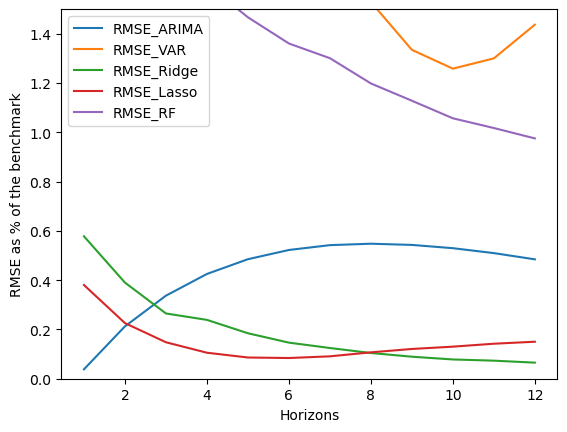

<Figure size 640x480 with 0 Axes>

In [39]:
graph_models(RMSE_2019_results, lim=1.5)

plt.savefig("../../../output/3_Regression/c19/c19_rmse.png", bbox_inches='tight', dpi=300)

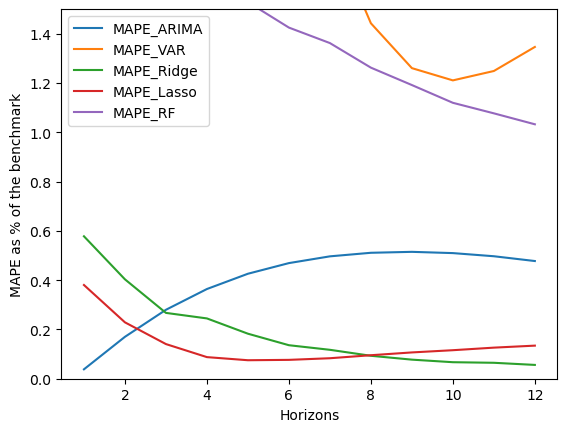

<Figure size 640x480 with 0 Axes>

In [40]:
graph_models(MAPE_2019_results, metric = "MAPE", lim=1.5)

plt.savefig("../../../output/3_Regression/c19/c19_mape.png", bbox_inches='tight', dpi=300)

### 3.3.2 Coefficients by model

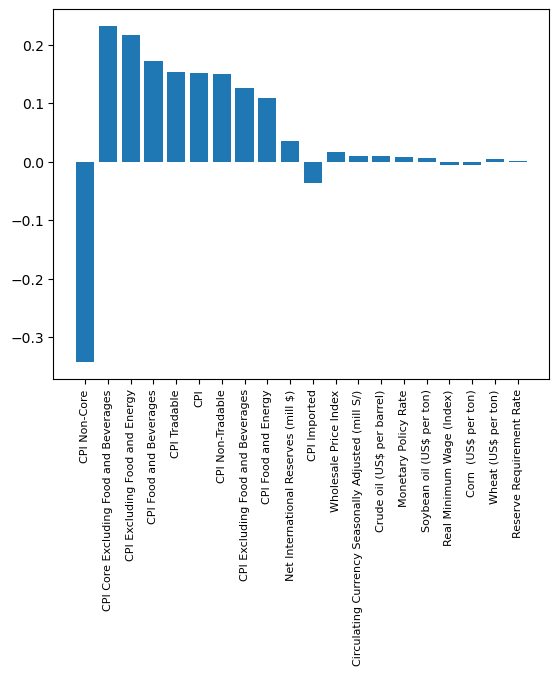

<Figure size 640x480 with 0 Axes>

In [41]:
graph_coefficients(vars_df_ridge, value = "Coefficient")

plt.savefig("../../../output/3_Regression/c19/c19_coef_ridge.png", bbox_inches='tight', dpi=300)

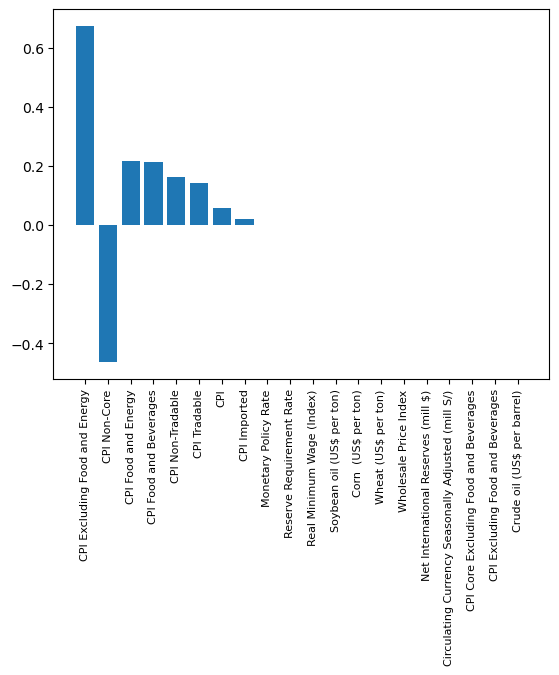

<Figure size 640x480 with 0 Axes>

In [42]:
graph_coefficients(vars_df_lasso, value = "Coefficient")

plt.savefig("../../../output/3_Regression/c19/c19_coef_lasso.png", bbox_inches='tight', dpi=300)

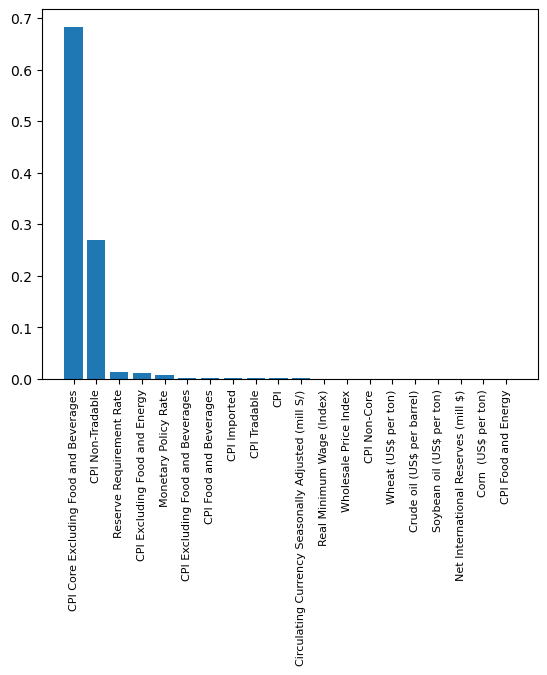

<Figure size 640x480 with 0 Axes>

In [43]:
graph_coefficients(vars_df_rf, value = "Importance Score")

plt.savefig("../../../output/3_Regression/c19/c19_coef_rf.png", bbox_inches='tight', dpi=300)